# 7. See if any nested models fit the data more parsimoniously
(PPP-adjusted)

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [3]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDPb', 'EIb')
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))[cols]

log_cols <- c('EIb', 'P_GDPb', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1990 & year <= 2015)
data.log <- subset(data.log, year >= 1990 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1990 & year <= 2015)

In [4]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48927 -0.08397 -0.00542  0.10014  0.53059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.03362    0.04472   0.752    0.459
ISG          0.03869    0.06921   0.559    0.581

Residual standard error: 0.207 on 24 degrees of freedom
Multiple R-squared:  0.01286,	Adjusted R-squared:  -0.02828 
F-statistic: 0.3126 on 1 and 24 DF,  p-value: 0.5813


[1] 0.001404828


Call:
lm(formula = "EIb ~ ISG", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.052488 -0.018330  0.000001  0.013820  0.047990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.950e-02  5.694e-03  -5.181 3.41e-05 ***
ISG          5.684e-05  8.626e-03   0.007    0.995    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02569 on 22 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  1.974e-06,	Adjusted R-squared:  -0.04545 
F-statistic: 4.342e-05 on 1 and 22 DF,  p-value: 0.9948


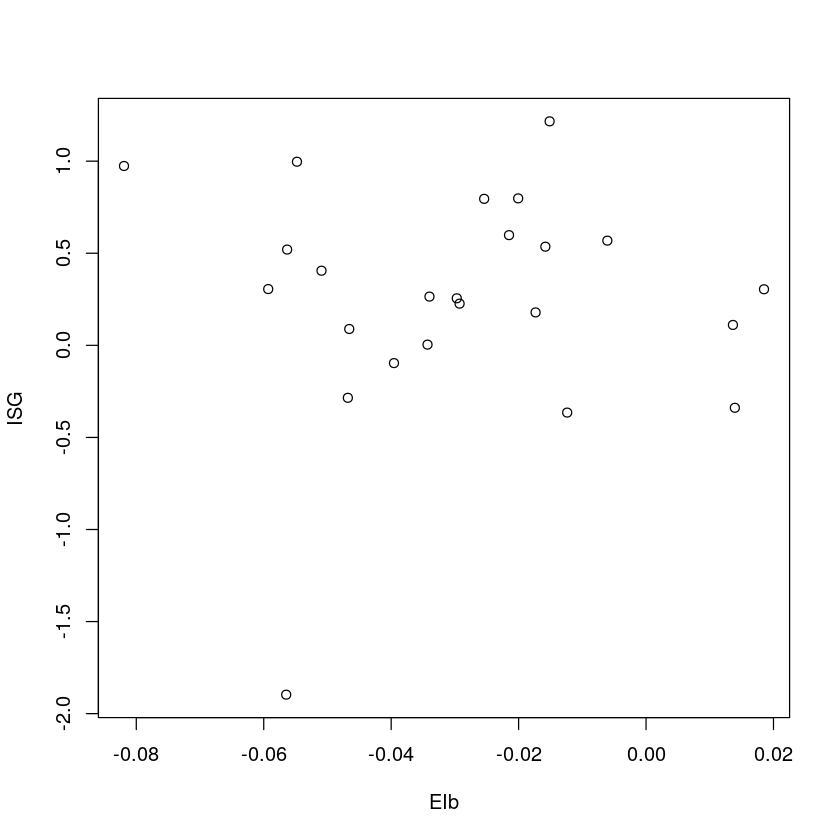

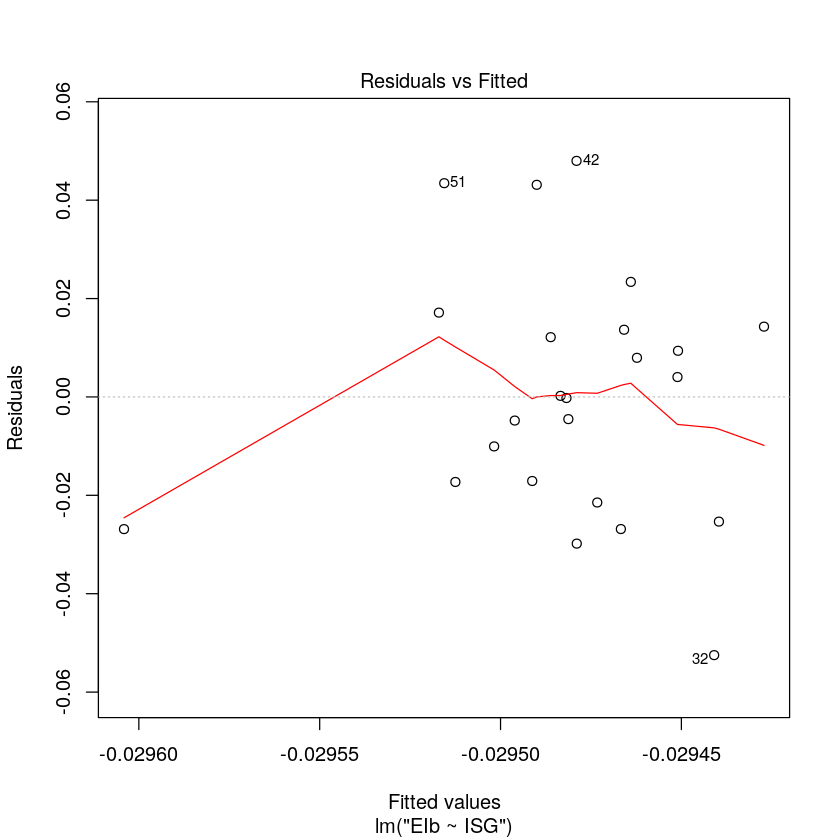

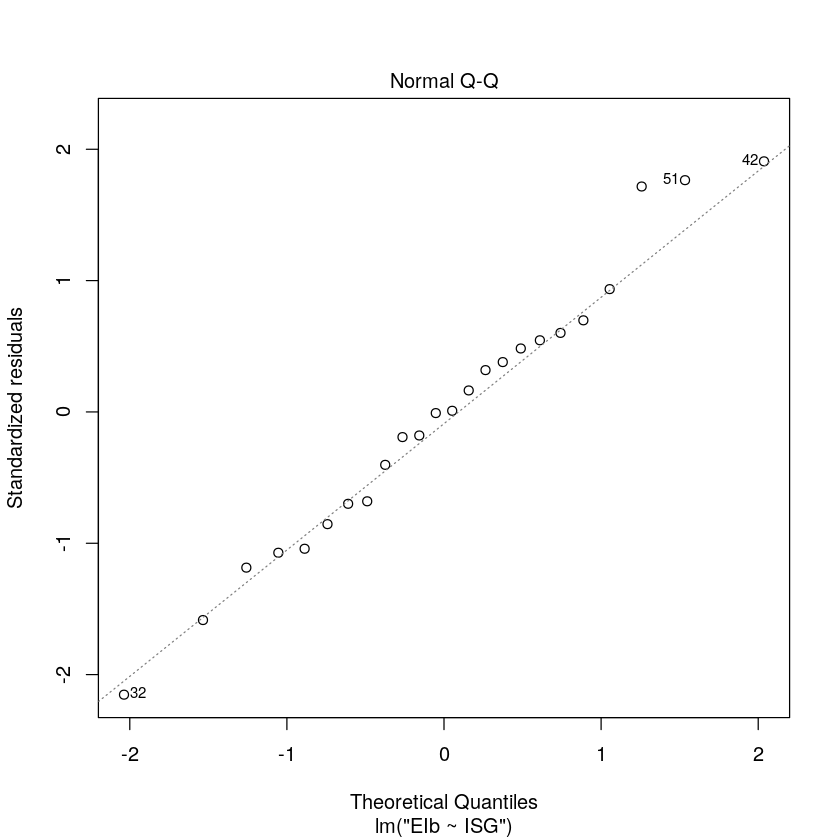

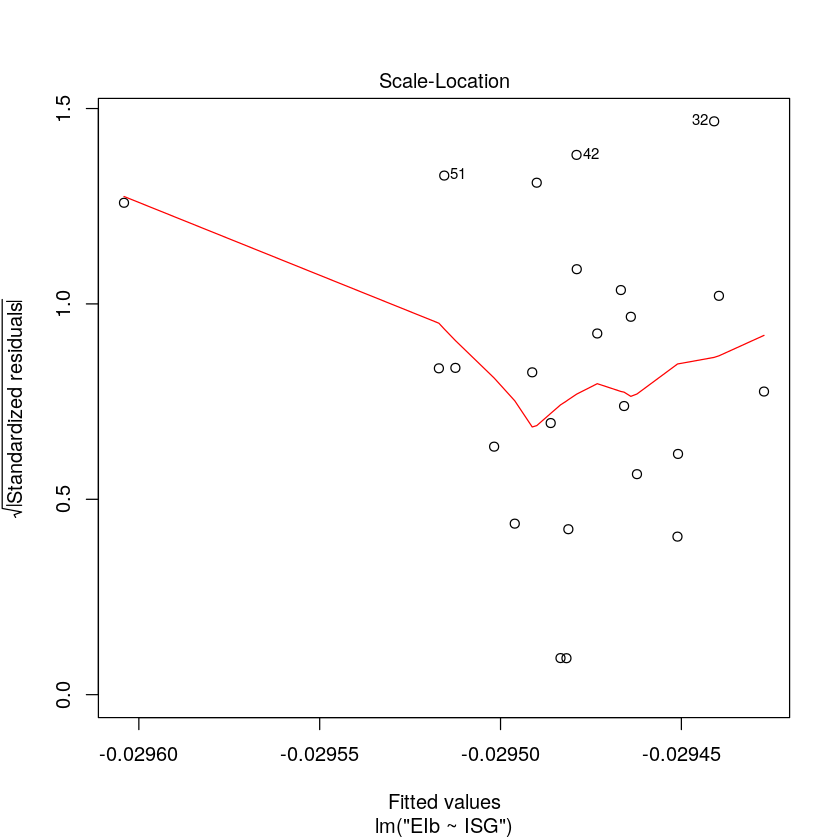

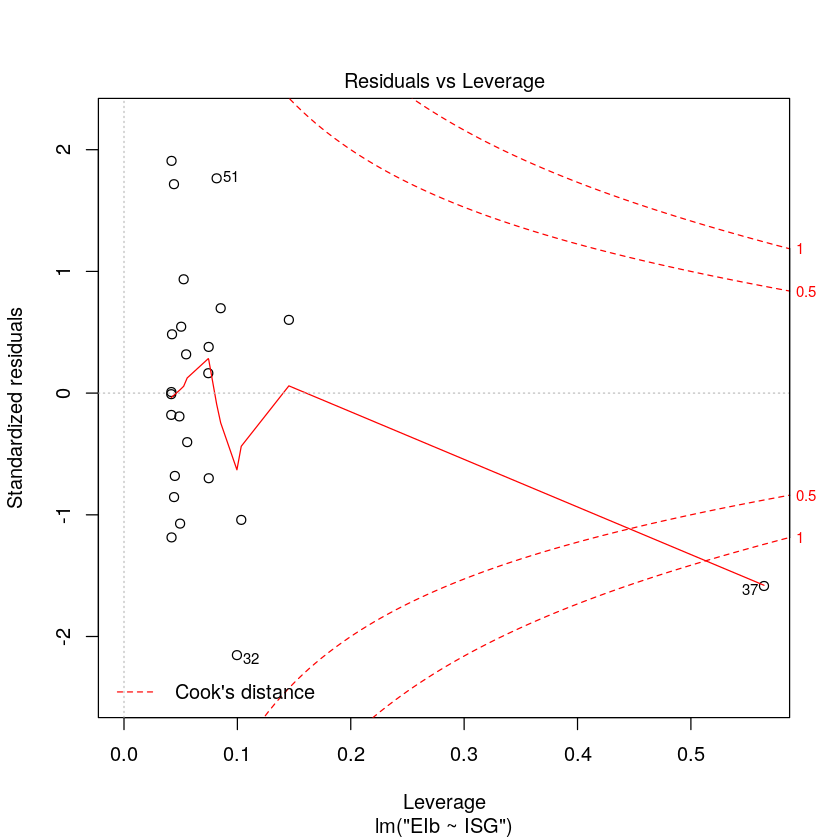

In [5]:
with(data.logdiff, {plot(EIb, ISG); cor(EIb, ISG, use='pairwise.complete.obs')})
summary(lm('EIb ~ ISG', data=data.logdiff))
plot(lm('EIb ~ ISG', data=data.logdiff))

[1] 0.4512545


Call:
lm(formula = "P_GDPb ~ TO", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015948 -0.012304 -0.002614  0.010253  0.025051 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0537131  0.0027073  19.840 5.76e-16 ***
TO          0.0020126  0.0008299   2.425   0.0236 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01298 on 23 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2036,	Adjusted R-squared:  0.169 
F-statistic: 5.881 on 1 and 23 DF,  p-value: 0.02356


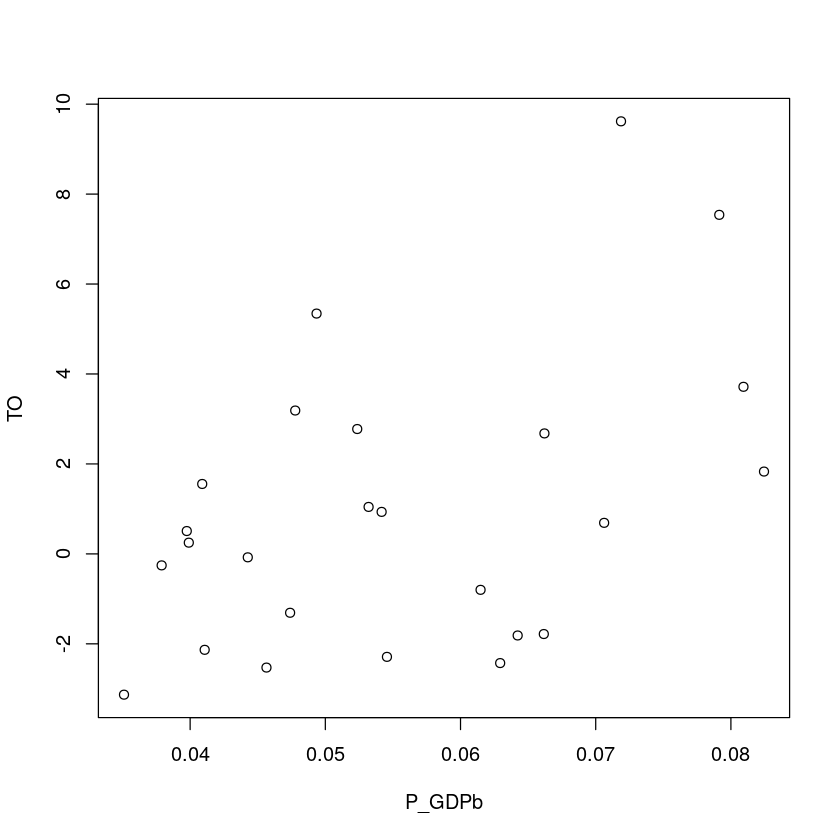

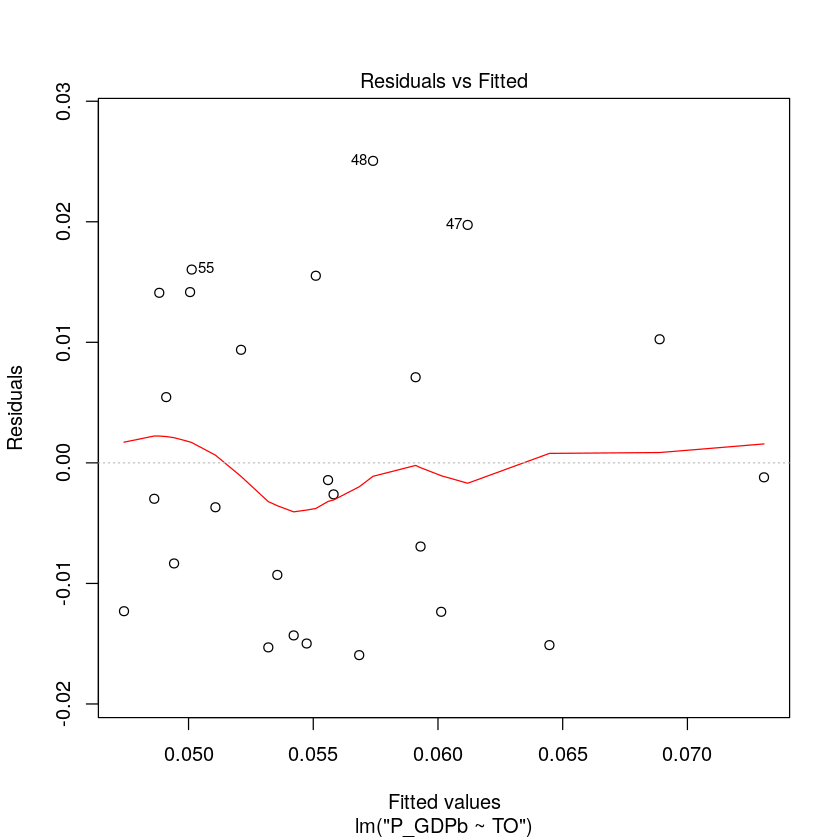

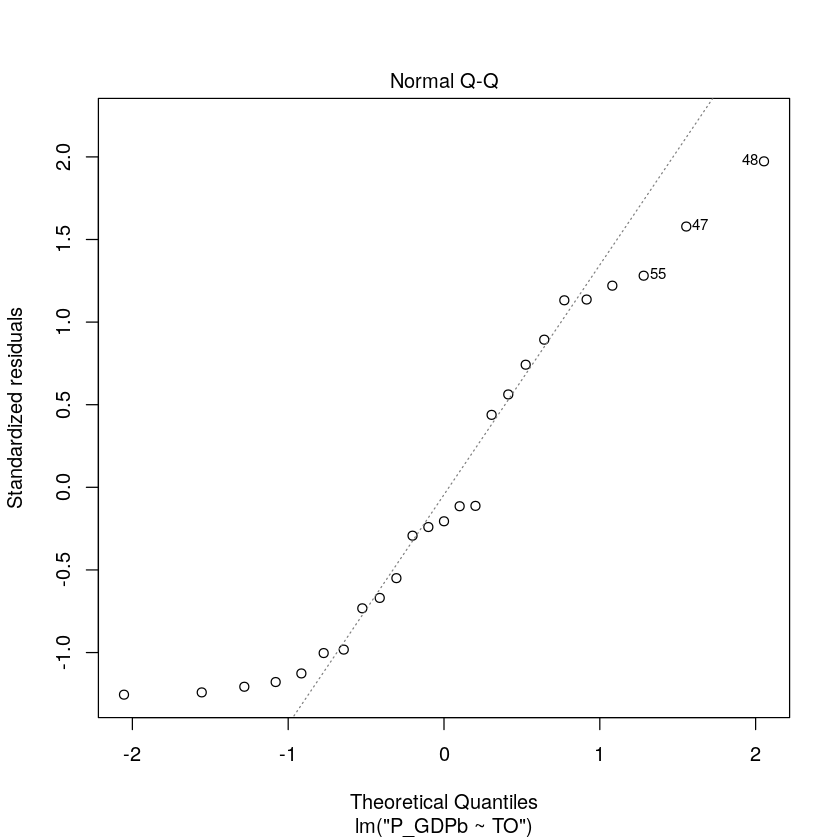

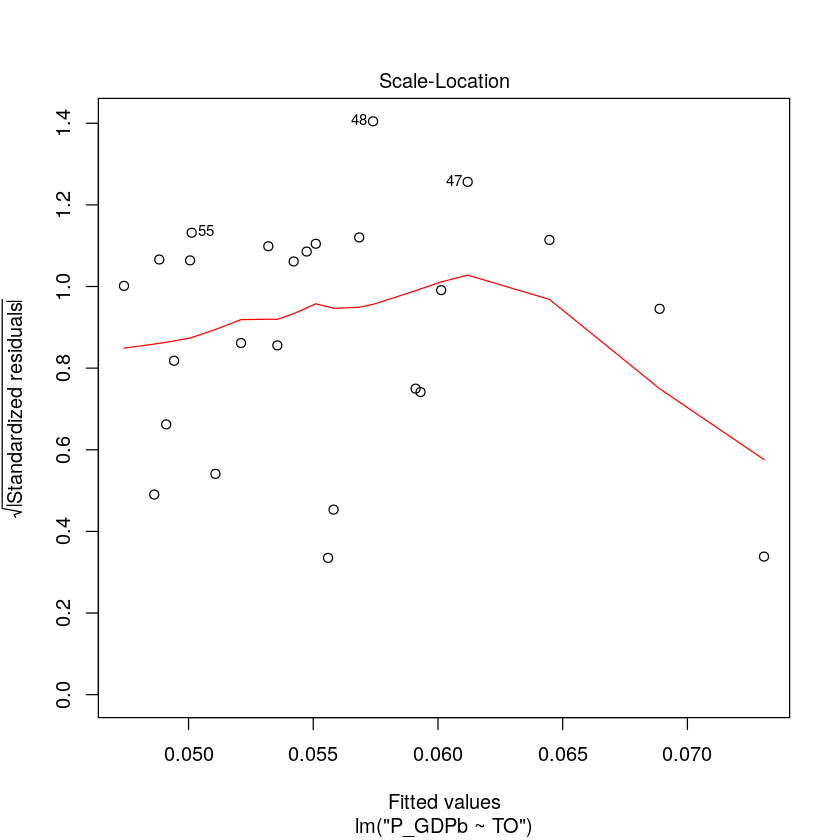

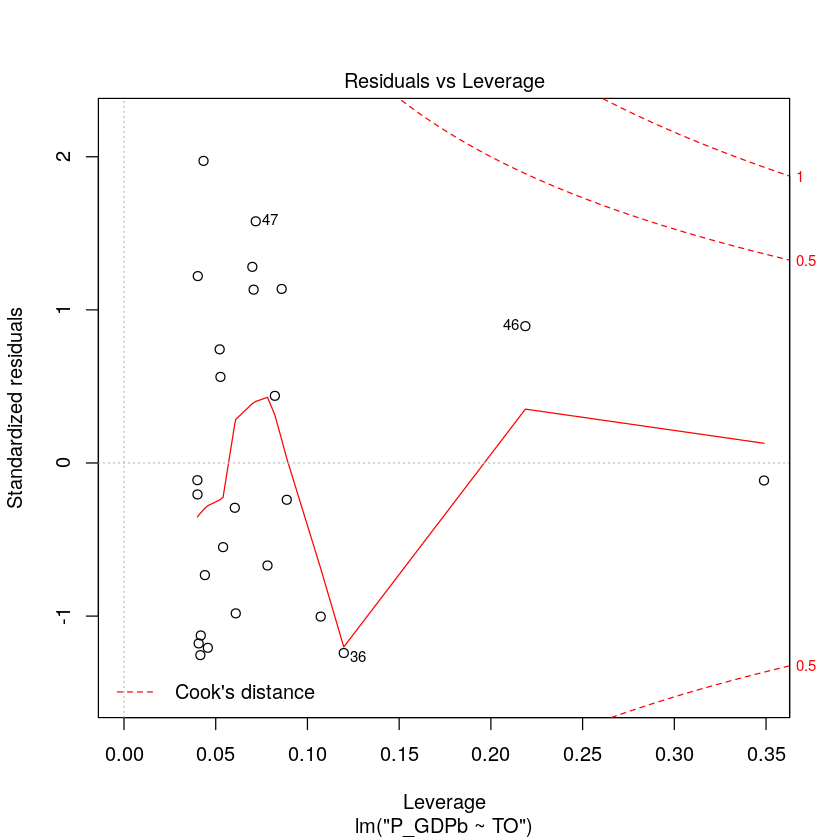

In [6]:
with(data.logdiff, {plot(P_GDPb, TO); cor(P_GDPb, TO, use='pairwise.complete.obs')})
summary(lm('P_GDPb ~ TO', data=data.logdiff))
plot(lm('P_GDPb ~ TO', data=data.logdiff))

In [7]:
summary(lm('EIb ~ ISG + TO + TI + P_GDPb', data=data.logdiff))


Call:
lm(formula = "EIb ~ ISG + TO + TI + P_GDPb", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057370 -0.014397 -0.000563  0.014938  0.048453 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0047019  0.0239286  -0.196    0.846
ISG          0.0004422  0.0089744   0.049    0.961
TO           0.0007217  0.0020045   0.360    0.723
TI           0.0267926  0.0263886   1.015    0.323
P_GDPb      -0.4844747  0.4390350  -1.103    0.284

Residual standard error: 0.02575 on 19 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1324,	Adjusted R-squared:  -0.05027 
F-statistic: 0.7248 on 4 and 19 DF,  p-value: 0.5858


In [8]:
orig.model <- '
## path model
EIb ~ p_eib_isg*ISG + p_eib_to*TO + p_eib_ti*TI + p_eib_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG
P_GDPb ~ p_pgdpb_to*TO
## indirect effect
p_eib_ti_isg := p_eib_ti*p_ti_isg
p_eib_pgdpb_to := p_eib_pgdpb*p_pgdpb_to
## total effect
p_eib_isg_total := p_eib_isg + (p_eib_ti*p_ti_isg)
p_eib_to_total := p_eib_to + (p_eib_pgdpb*p_pgdpb_to)
'
orig.model.fit <- sem(orig.model, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
summary(orig.model.fit, standardized=TRUE, fit.measures=FALSE)

lavaan 0.6-5 ended normally after 52 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            26
  Number of missing patterns                         3
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 1.553       1.670
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.670       0.644
  Scaling correction factor                                  0.930
    for the Yuan-Bentler correction (Mplus variant) 

Parameter Estimates:

  Information                                      Observed
  Observed information based on                     Hessian
  Standard e

In [9]:
orig.model <- '
## path model
EIb ~ p_eib_isg*ISG + p_eib_to*TO + p_eib_ti*TI + p_eib_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG
P_GDPb ~ p_pgdpb_to*TO + p_pdgpb_isg*ISG
## indirect effect
p_eib_ti_isg := p_eib_ti*p_ti_isg
p_eib_pgdpb_to := p_eib_pgdpb*p_pgdpb_to
## total effect
p_eib_isg_total := p_eib_isg + (p_eib_ti*p_ti_isg)
p_eib_to_total := p_eib_to + (p_eib_pgdpb*p_pgdpb_to)
'
orig.model.fit <- sem(orig.model, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
summary(orig.model.fit, standardized=TRUE, fit.measures=FALSE)

lavaan 0.6-5 ended normally after 66 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         13
                                                      
  Number of observations                            26
  Number of missing patterns                         3
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 1.146       0.993
  Degrees of freedom                                 2           2
  P-value (Chi-square)                           0.564       0.609
  Scaling correction factor                                  1.154
    for the Yuan-Bentler correction (Mplus variant) 

Parameter Estimates:

  Information                                      Observed
  Observed information based on                     Hessian
  Standard e

In [10]:
orig.model <- '
## path model
EIb ~ p_eib_isg*ISG + p_eib_to*TO + p_eib_ti*TI + p_eib_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG + p_ti_to*TO
P_GDPb ~ p_pgdpb_to*TO + p_pdgpb_isg*ISG
## indirect effect
p_eib_ti_isg := p_eib_ti*p_ti_isg
p_eib_pgdpb_to := p_eib_pgdpb*p_pgdpb_to
## total effect
p_eib_isg_total := p_eib_isg + (p_eib_ti*p_ti_isg)
p_eib_to_total := p_eib_to + (p_eib_pgdpb*p_pgdpb_to)
'
orig.model.fit <- sem(orig.model, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
summary(orig.model.fit, standardized=TRUE, fit.measures=FALSE)

lavaan 0.6-5 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         14
                                                      
  Number of observations                            26
  Number of missing patterns                         3
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 0.918       0.695
  Degrees of freedom                                 1           1
  P-value (Chi-square)                           0.338       0.405
  Scaling correction factor                                  1.322
    for the Yuan-Bentler correction (Mplus variant) 

Parameter Estimates:

  Information                                      Observed
  Observed information based on                     Hessian
  Standard e